<a href="https://colab.research.google.com/github/Abeermousa/Arithmatic-operation-in-python/blob/master/trafic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as Sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

**Import Data Set and Explorit**

In [63]:
#cloning repo containing the traffic sign dataset 
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [64]:
#list dataset contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [65]:
#load dataset
data= pd.read_csv('german-traffic-signs/signnames.csv')

In [66]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [67]:
#loading pickled dataset
with open("german-traffic-signs/train.p",mode='rb')as training:
  train=pickle.load(training)
  with open("german-traffic-signs/valid.p",mode='rb')as validation:
   valid = pickle.load(validation)
  with open("german-traffic-signs/test.p",mode='rb')as testing:
   test=pickle.load(testing)

In [68]:
x_train, y_train =train ['features'], train['labels']
x_validation, y_validation = valid ['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [69]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=1


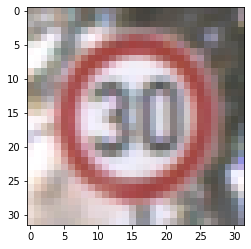

In [70]:
#select random images from our training
index =np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print("image label={}".format(y_train[index]))

**Image pre-processing**

In [71]:
#shuffle the data
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [72]:
def preprocessing(img):
  #convert to gray scale
  img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  #Appling Histogram equlaization  use Hist function
  img=cv2.equalizeHist(img)
  #Normalization
  img=img/255
  return img


In [73]:
x_train_processed =np.array(list(map(preprocessing,x_train)))
x_validation_processed =np.array(list(map(preprocessing,x_validation)))
x_test_processed =np.array(list(map(preprocessing,x_test)))

In [74]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)
x_validation_processed = x_validation_processed.reshape(4410,32,32,1)

In [75]:
print(x_train_processed.shape)
print(x_test_processed.shape)
print(x_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


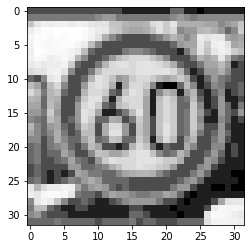

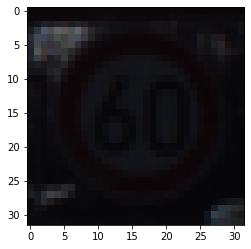

In [76]:
#generate random number
i=random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

**Build Deep Convolution Neural Network Model**

In [84]:
model= Sequential()
#add the convolutional layer
#filters, size of filters,input_shape,activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a dropout layer
model.add(Dropout(0.25))
#add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten the image to 1 dimensional array
model.add(Flatten())
#add a dense layer:amount of nodes, activation
model.add(Dense(256,activation='relu'))
#place a dropout layer
#0.5 drop out rate is recommended, half input nodes will be dropped at each mupdate
model.add(Dropout(0.5))
#defining the output layer of our network
model.add(Dense(43,activation='softmax'))

model.summary()








Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [87]:
#compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
history=model.fit(x_train_processed,
                  y_train,
                  batch_size=500,
                  epochs=50,
                  verbose=1,
                  validation_data=(x_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 53s 742ms/step - loss: 3.6546 - accuracy: 0.0489 - val_loss: 3.4540 - val_accuracy: 0.1816
Epoch 2/50
70/70 [==============================] - 52s 740ms/step - loss: 3.3469 - accuracy: 0.1262 - val_loss: 2.9699 - val_accuracy: 0.3054
Epoch 3/50
70/70 [==============================] - 52s 744ms/step - loss: 2.8036 - accuracy: 0.2925 - val_loss: 2.3181 - val_accuracy: 0.4499
Epoch 4/50
70/70 [==============================] - 52s 745ms/step - loss: 2.2807 - accuracy: 0.4041 - val_loss: 1.8511 - val_accuracy: 0.5177
Epoch 5/50
70/70 [==============================] - 52s 745ms/step - loss: 1.8745 - accuracy: 0.4883 - val_loss: 1.5197 - val_accuracy: 0.6045
Epoch 6/50
70/70 [==============================] - 52s 745ms/step - loss: 1.6000 - accuracy: 0.5483 - val_loss: 1.2810 - val_accuracy: 0.6608
Epoch 7/50
70/70 [==============================] - 52s 744ms/step - loss: 1.3941 - accuracy: 0.5985 - val_loss: 1.1177 - val_accuracy: 0.7052

## **Evaluate Performance of the model**

In [89]:
score= model.evaluate(x_test_processed,y_test)
print('test accuracy',score[1])

395/395 [==============================] - 5s 14ms/step - loss: 0.2962 - accuracy: 0.9211
test accuracy 0.9210609793663025


In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

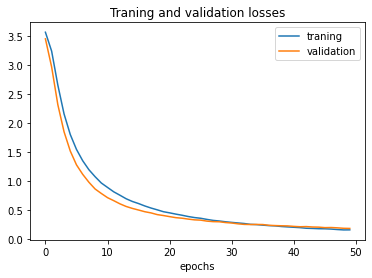

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['traning','validation'])
plt.title('Traning and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

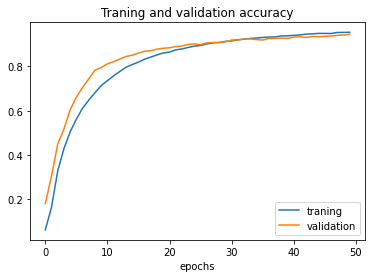

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['traning','validation'])
plt.title('Traning and validation accuracy')
plt.xlabel('epochs')

In [94]:
prediction=model.predict_classes(x_test_processed)
y_true_label=y_test

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


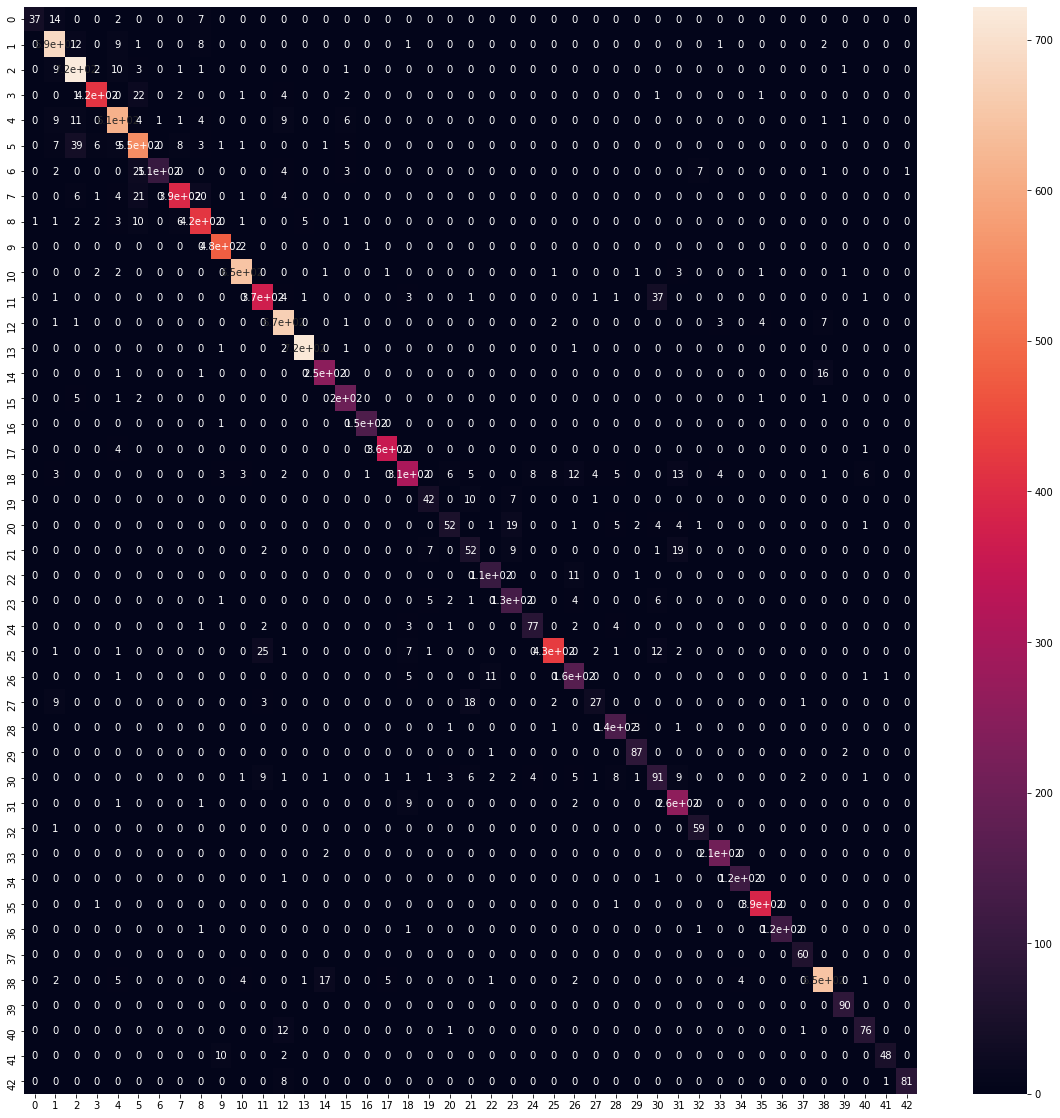

In [98]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true_label, prediction)
plt.figure(figsize=(20,20))
Sns.heatmap(matrix,annot=True)


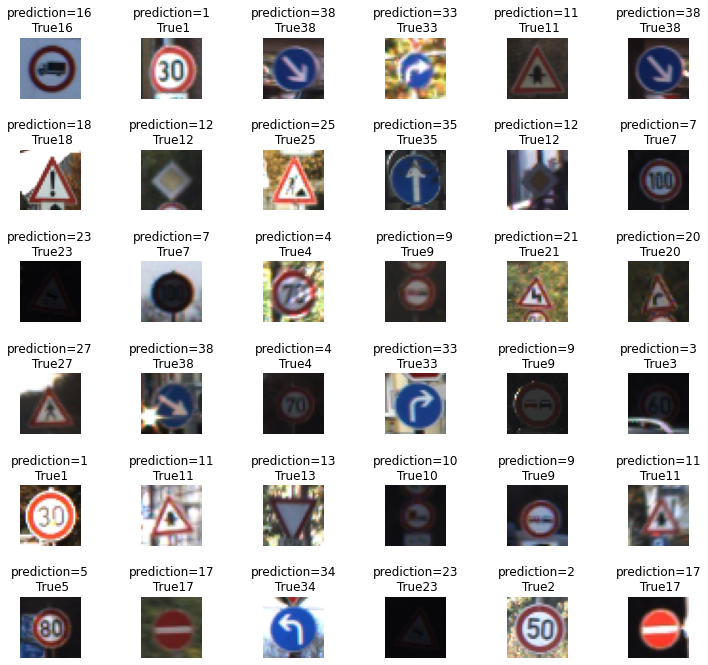

In [102]:
L=6
W=6
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('prediction={}\n True{}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [103]:
model.save('trafic sign Deep learning project for self driving car.h5')